# Kaggle Project

## Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/data

**Task:**

기대수명에 영향을 미치는 여러 요인에 대한 분석  
예방접종 요인, 사망률 요인, 경제적 요인, 사회적 요인, 기타 건강 관련 요인 등 여러 요인 중 어떤 것이 기대수명과 큰 연관이 있을지 파악하고, 해당 변수로 기대수명 예측

**Datasets**

* Train dataset: 전체 데이터셋 중 전처리 과정을 거친 후 (2896개), 60% 사용 (1737개)

* Validation dataset: 전체 데이터셋 중 전처리 과정을 거친 후 (2896개), 20% 사용 (579개)

* Test dataset: 전체 데이터셋 중 전처리 과정을 거친 후 (2896개), 20% 사용 (580개)

**Features(x):**

'Country' : 국가  
'Year' : 조사년도  
'Status' : 국가의 상태 (개발도상국 / 선진국)  
'Adult Mortality' : 남녀 모두의 성인 사망률 (인구 1000명당 15 ~ 60년 사이에 사망할 확률)  
'infant deaths' : 인구 1000명당 유아 사망 수  
'Alcohol': 알코올, 1인당(15세 이상) 소비량 기록(순수 알코올 리터 단위)  
'percentage expenditure' : 1인당 국내총생산(GDP) 대비 의료비 지출 (%)  
'Hepatitis B' : 1세 어린이의 B형 간염 (HepB) 예방접종률 (%)  
'Measles': 홍역 - 인구 1000명당 보고된 사례 수  
'BMI' : 전체 인구의 평균 체질량 지수  
'under-five deaths' : 인구 1000명당 5세 미만 사망자 수  
'Polio' : 1세 소아마비 (Pol3) 예방접종률 (%)  
'Total expenditure' : 총 정부 지출 대비 일반정부 보건 지출 비율 (%)  
'Diphtheria' : 1세 어린이의 디프테리아 파상풍 독소 및 백일해 (DTP3) 예방접종률 (%)  
'HIV/AIDS' : 출생 1,000명당 사망 HIV/AIDS (0 ~ 4세)  
'GDP' : 1인당 국내총생산(USD)  
'Population' : 국가의 인구  
'thinness 1-19 years' : 10 ~ 19세 아동·청소년의 마른 체형 유병률 (%)  
'thinness 5-9 years' : 5 ~ 9세 어린이의 마른 체형 유병률 (%)  
'Income composition of resources' : 자원의 소득 구성 측면에서 인간 개발 지수 (0 ~ 1 범위의 지수)  
'Schooling' : 재학년수 (년)  

**Target(y):**

'Life expectancy' : 기대수명

---

## Build Your Model

In [1]:
# 라이브러리

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

### Data preprocessing

In [2]:
# csv파일을 불러온 후, column명의 공백을 제거하여 renaming
# target feature인 Life expectancy열의 위치를 맨 뒤로 변경

data = pd.read_csv('./data/Life Expectancy Data.csv')
data.columns = ['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
                'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
                'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years',
                'Income composition of resources', 'Schooling']
data = data[['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
            'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
            'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years', 'thinness 5-9 years',
            'Income composition of resources', 'Schooling', 'Life expectancy']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   BMI                              2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

<Axes: xlabel='Life expectancy', ylabel='Count'>

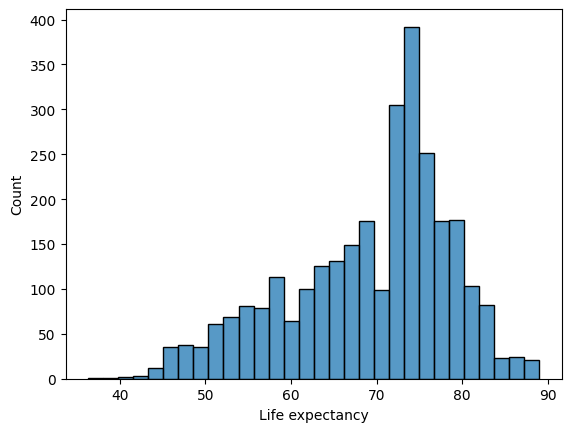

In [3]:
# target에 대한 시각화

sns.histplot(data, x = 'Life expectancy')

In [4]:
# correlation matrix를 구하기 위해 자료형이 맞지 않는 columns 제거

data_dp = data.drop(['Country', 'Status'], axis = 1)
data_dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7   BMI                              2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12  HIV/AIDS            

In [5]:
data_corr = data_dp.corr()
data_corr

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
Year,1.000000,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400,0.170033
Adult Mortality,-0.079052,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612,-0.696359
infant deaths,-0.037415,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720,-0.196557
Alcohol,-0.052990,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378,0.404877
percentage expenditure,0.031400,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687,0.381864
Hepatitis B,0.104333,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117,0.256762
Measles,-0.082493,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225,-0.157586
BMI,0.108974,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961,0.567694
under-five deaths,-0.042937,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373,-0.222529
Polio,0.094158,-0.274823,-0.170689,0.221734,0.147259,0.486171,-0.136166,0.284569,-0.188720,1.000000,0.137330,0.673553,-0.159560,0.211976,-0.038540,-0.221823,-0.222592,0.381078,0.417866,0.465556


<Axes: >

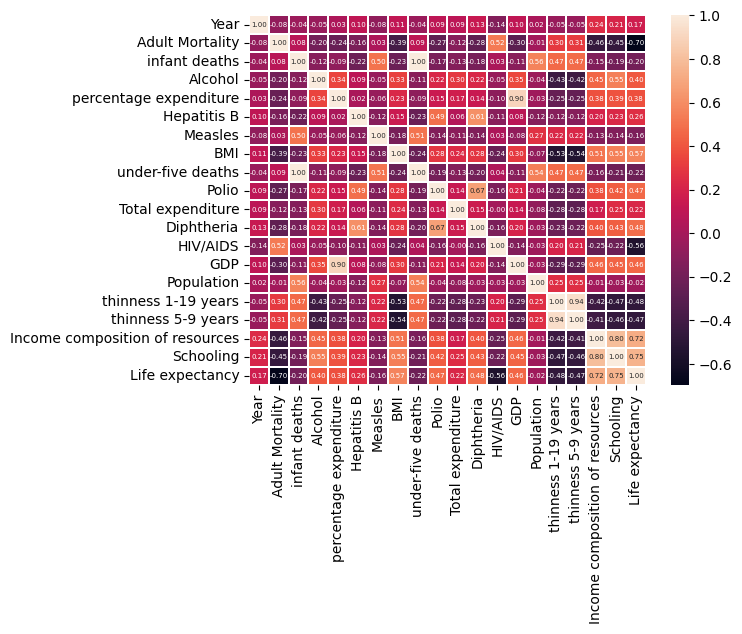

In [6]:
sns.heatmap(data_corr, annot = True, linewidths = 0.3, fmt = '0.2f', annot_kws = {"size" : 5})

In [7]:
# 상관계수의 절댓값을 target과의 관련성이 높은 순으로 정렬

corr_order = data_corr.loc[:'Schooling', 'Life expectancy'].abs().sort_values(ascending = False)
corr_order

Schooling                          0.751975
Income composition of resources    0.724776
Adult Mortality                    0.696359
BMI                                0.567694
HIV/AIDS                           0.556556
Diphtheria                         0.479495
thinness 1-19 years                0.477183
thinness 5-9 years                 0.471584
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
under-five deaths                  0.222529
Total expenditure                  0.218086
infant deaths                      0.196557
Year                               0.170033
Measles                            0.157586
Population                         0.021538
Name: Life expectancy, dtype: float64

In [8]:
# correlation이 높은 feature 중 BMI와 Life expectancy 사이의 regression을 진행하기로 결정

names = ['Life expectancy', 'BMI']
data_final = data_dp.loc[:, names]
data_final = data_final.dropna()
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2896 entries, 0 to 2937
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Life expectancy  2896 non-null   float64
 1   BMI              2896 non-null   float64
dtypes: float64(2)
memory usage: 67.9 KB


In [9]:
data_final

,Life expectancy,BMI
0,65.0,19.1
1,59.9,18.6
2,59.9,18.1
3,59.5,17.6
4,59.2,17.2
...,...,...
2933,44.3,27.1
2934,44.5,26.7
2935,44.8,26.3
2936,45.3,25.9


### Model Construction

In [10]:
x_data = data_final['BMI'].to_numpy()
y_data = data_final['Life expectancy'].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42)
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((1737,), (579,), (580,), (1737,), (579,), (580,))

In [11]:
x_train = x_train.reshape(-1, 1)
# y_train = y_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)
# y_val = y_val.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((1737, 1), (579, 1), (580, 1), (1737,), (579,), (580,))

In [12]:
# Linear Regression

model_lr = LinearRegression(fit_intercept = True, copy_X = True, n_jobs = None, positive = False)

In [13]:
# Decision Tree Regression

model_dt = DecisionTreeRegressor(criterion = 'squared_error', splitter = 'best', max_depth = 10, min_samples_split = 2,
                                 min_samples_leaf = 1, min_weight_fraction_leaf = 0.0, max_features = None, random_state = 0,
                                 max_leaf_nodes = None, min_impurity_decrease = 0.0, ccp_alpha = 0.0)

In [14]:
# Support Vector Machine Regression

model_svr = SVR(kernel = 'rbf', degree = 3, gamma='scale', coef0 = 0.0, tol = 0.001, C = 1.0,
                epsilon = 0.1, shrinking = True, cache_size = 200, verbose = False, max_iter = -1)

In [15]:
# nn모델을 사용하기 위해 numpy array를 tensor로 변환

x_torch = torch.Tensor(x_data)
y_torch = torch.Tensor(y_data)
x = x_torch.view(-1, 1)
y = y_torch.view(-1, 1)
print(x, y)
print(x.shape, y.shape)

tensor([[19.1000],
        [18.6000],
        [18.1000],
        ...,
        [26.3000],
        [25.9000],
        [25.5000]]) tensor([[65.0000],
        [59.9000],
        [59.9000],
        ...,
        [44.8000],
        [45.3000],
        [46.0000]])
torch.Size([2896, 1]) torch.Size([2896, 1])


In [16]:
# nn모델로 linear

model_l = nn.Linear(1, 1, bias = False)
print(model_l.weight)
loss = nn.MSELoss()
optimizer = optim.SGD(model_l.parameters(), lr = 0.01)

Parameter containing:
tensor([[0.9577]], requires_grad=True)


In [17]:
# mlp linear

hidden = nn.Linear(1, 20, bias = True)
output = nn.Linear(20, 1, bias = True)
model_hl = nn.Sequential(hidden, output)
loss = nn.MSELoss()
optimizer = optim.SGD(model_hl.parameters(), lr = 0.1)

In [18]:
# activation function을 추가하여 nonlinear

hidden = nn.Linear(1, 20, bias = True)
activation = nn.ReLU()
output = nn.Linear(20, 1, bias = True)
model_nl = nn.Sequential(hidden, activation, output)
loss = nn.MSELoss()
optimizer = optim.SGD(model_nl.parameters(), lr = 0.1)

### Train Model & Select Model

In [19]:
models = [model_lr, model_dt, model_svr]

In [20]:
def mse_loss(pre, y) :
    return ((pre - y) ** 2).mean()

In [21]:
for model in models :
    model.fit(x_train, y_train)
    pre = model.predict(x_train)
    
    loss_value = mse_loss(pre, y_train)
    
    print(model, loss_value)

LinearRegression() 61.67445948789584
DecisionTreeRegressor(max_depth=10, random_state=0) 32.899241385365194
SVR() 48.391698521909326


In [22]:
for model in models :
    pre = model.predict(x_val)
    
    loss_value = mse_loss(pre, y_val)
    
    print(model, loss_value)

LinearRegression() 64.41894468729411
DecisionTreeRegressor(max_depth=10, random_state=0) 49.493062451449475
SVR() 49.40077984244304


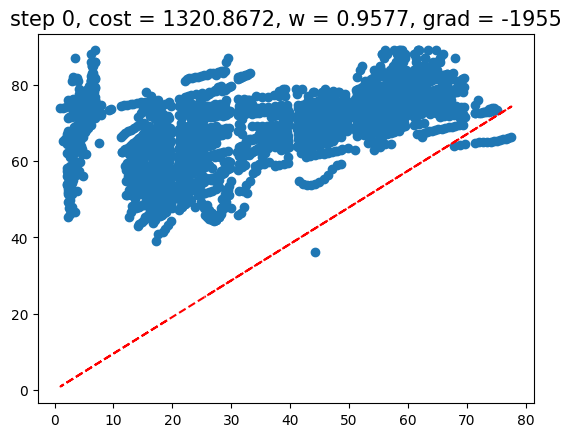

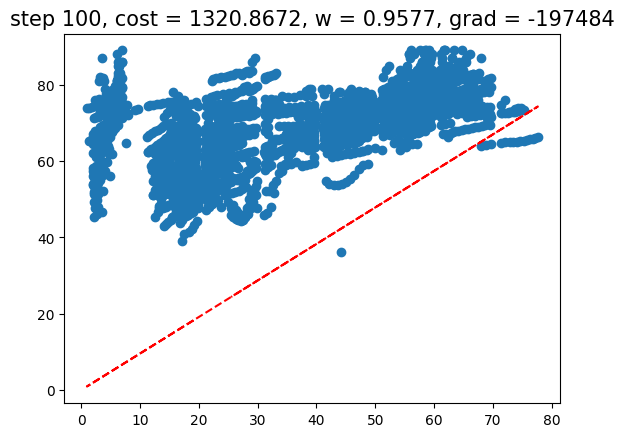

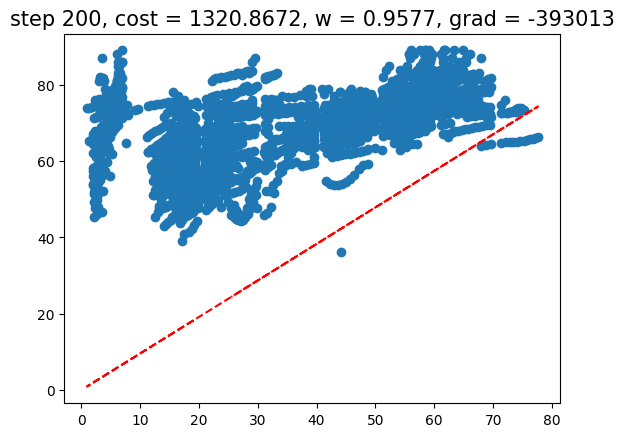

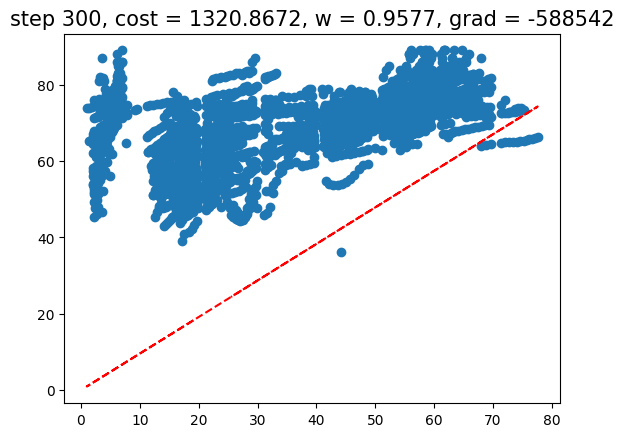

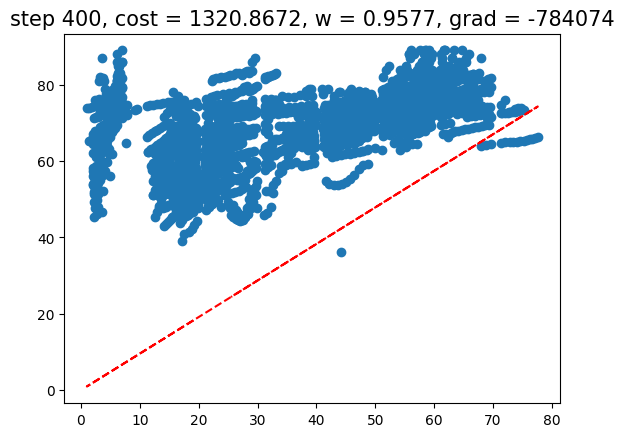

36.61735153198242

In [23]:
# nn모델로 linear

for step in range(500) :
    pre = model_l(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 100 == 0 :
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), pre.data.numpy(), 'r--')
        plt.title('step %d, cost = %.4f, w = %.4f, grad = %4.f' 
                  % (step, cost.item() ,model_l.weight.item(), model_l.weight.grad.item()), fontdict = {'size' : 15})
        plt.show()

x_new = torch.Tensor([torch.mean(x)]) # BMI지수의 평균을 새로운 input으로 사용
y_new = model_l(x_new)
y_new.item()

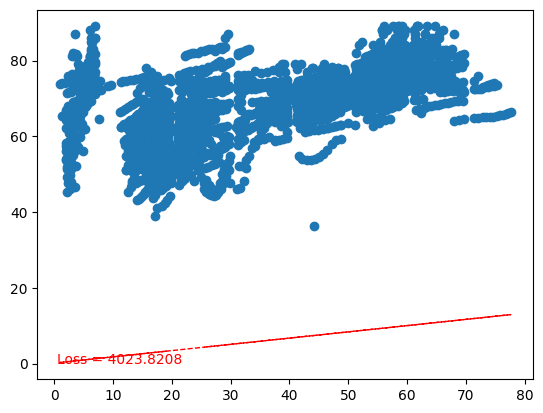

6.4343671798706055

In [24]:
# mlp linear

for step in range(500) :
    pre = model_hl(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw = 1)
plt.text(0.5, 0, 'Loss = %.4f' % cost.item(), fontdict = {'size' : 10, 'color' : 'red'})
plt.show()

x_new = torch.Tensor([torch.mean(x)])
y_new = model_hl(x_new)
y_new.item()

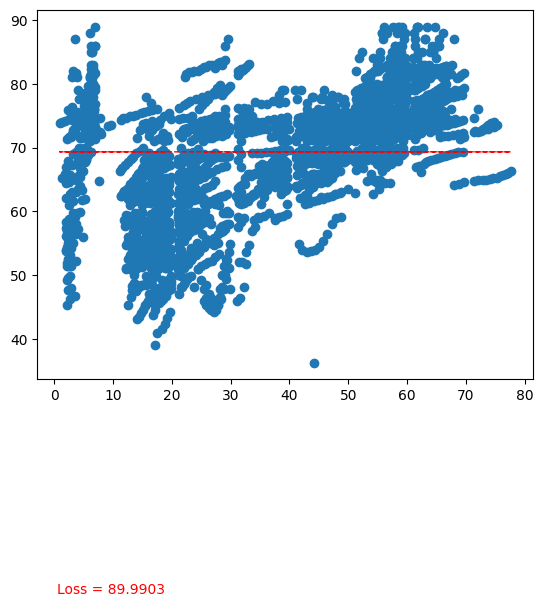

69.3506088256836

In [25]:
# activation function을 추가하여 nonlinear

for step in range(500) :
    pre = model_nl(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
plt.scatter(x.data.numpy(), y.data.numpy())
plt.plot(x.data.numpy(), pre.data.numpy(), 'r--', lw = 1)
plt.text(0.5, 0, 'Loss = %.4f' % cost.item(), fontdict = {'size' : 10, 'color' : 'red'})
plt.show()

x_new = torch.Tensor([torch.mean(x)])
y_new = model_nl(x_new)
y_new.item()

In [26]:
# model_lr의 파라미터 확인해보기

print("w :", model_lr.coef_, ", b :", model_lr.intercept_)

w : [0.25720246] , b : 59.79024244148301


In [27]:
# 가장 좋은 성능을 보여준 모델은 DecisionTreeRegressior

model_best = model_dt

---

## Performance

In [28]:
pre = model_best.predict(x_test)
loss_value = mse_loss(pre, y_test)
print(model_best, loss_value)

DecisionTreeRegressor(max_depth=10, random_state=0) 49.675730689687924


**The results explains**

기대수명에 영향을 미치는 변수로 BMI지수를 선택하였고, 여러 regression 모델을 사용하여 비교해보았다.  
loss_value는 50 정도로 좋은 성능을 보여준다고 할 수 없으므로, 성능 개선이 필요하다고 생각한다.